Naive Bayes Theorem:
Naive Bayes theorem is a probabilistic machine learning model used for classification tasks. It is based on Bayes' Theorem, which describes the probability of an event based on prior knowledge of conditions related to the event. The "naive" aspect comes from the assumption that all features in the dataset are independent of each other, which simplifies the computation but is often not true in real-world data. Despite this simplification, Naive Bayes classifiers often perform surprisingly well.
P(A/B)=P(A).P(B/A)/P(B)

Variants of Naive Bayes:
Bernolli Naive Bayes: when the features follows bernolli distribution outcome as 0,1 success r failure 
Multinomial Naive Bayes: outcome in the form of text(reviews )
Gaussian Naive Bayes:when the features follows gaussian distribution 

Application:
->Text classification
->spam detection
->News categorization
->Medical dignosis
->Language detection

Advantages of Naive Bayes
->Simplicity: Easy to understand and implement.
->Speed: Fast training and prediction, making it suitable for large datasets.
->Scalability: Performs well with large numbers of features.
->Low Storage Requirements: Requires less memory compared to other algorithms due to its probabilistic nature.
->Handles Missing Data: Can handle missing values naturally by ignoring the feature with the missing value during probability calculation.
->Good Performance with Limited Data: Often performs well even with small amounts of data.

Disadvantages of Naive Bayes
->Assumption of Independence: Assumes that features are independent, which is rarely true in real-world scenarios. This can lead to lower accuracy if features are highly correlated.
->Zero Probability Issue: If a categorical variable in the test set has a category that was not seen in the training set, it assigns zero probability to the new category, which can be problematic. This can be mitigated using techniques like Laplace smoothing.
->Continuous Variables: Handles continuous variables poorly unless they are binned or transformed in some way, as Gaussian Naive Bayes assumes a normal distribution for continuous features.
->Sensitivity to Imbalanced Data: May perform poorly on imbalanced datasets where some classes are underrepresented.
->Over-simplification: The naive assumption of independence might lead to oversimplification and can reduce the effectiveness in certain complex problems.

In [33]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score


In [2]:
data=sns.load_dataset('iris')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
data.shape

(150, 5)

EDA: Exploratory Data Analysis

In [4]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
data.duplicated().sum()

1

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.duplicated().sum()

0

In [8]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.118129,0.873738,0.820620
sepal_width,-0.118129,1.000000,-0.426028,-0.362894
petal_length,0.873738,-0.426028,1.000000,0.962772
petal_width,0.820620,-0.362894,0.962772,1.000000


Data visualization

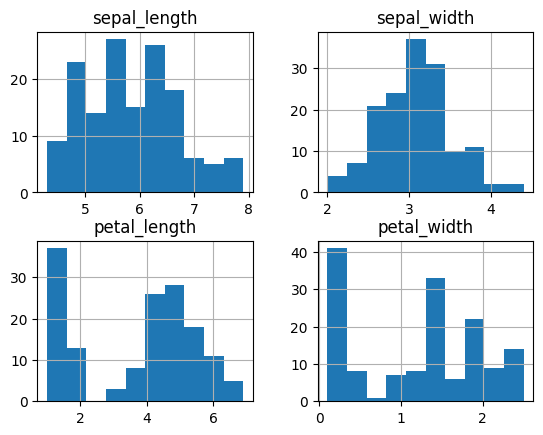

In [9]:
data.hist()
plt.show()

<Axes: xlabel='species', ylabel='count'>

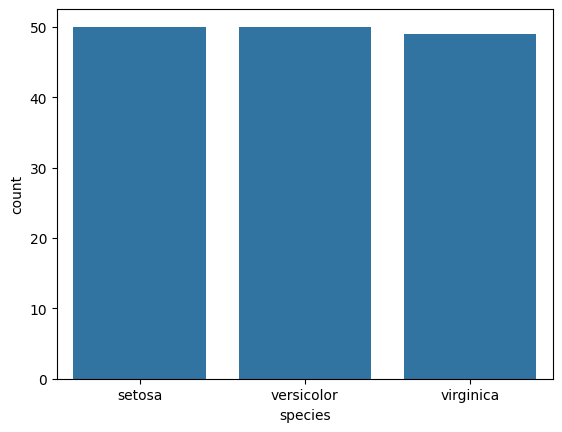

In [10]:
sns.countplot(x='species',data=data)

<Axes: >

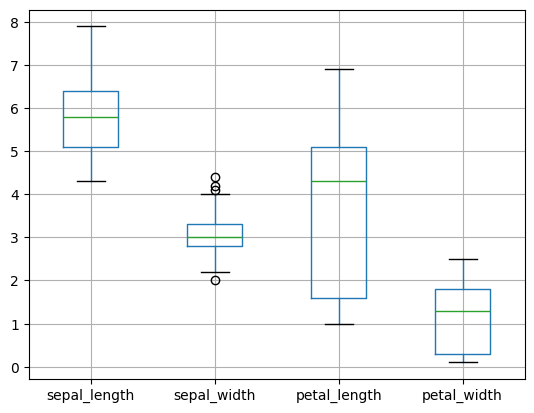

In [11]:
data.boxplot()

{'whiskers': [<matplotlib.lines.Line2D at 0x25289880ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x25289882210>,
 'boxes': [<matplotlib.lines.Line2D at 0x25289857710>],
 'medians': [<matplotlib.lines.Line2D at 0x252898837d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25289894310>],
 'means': []}

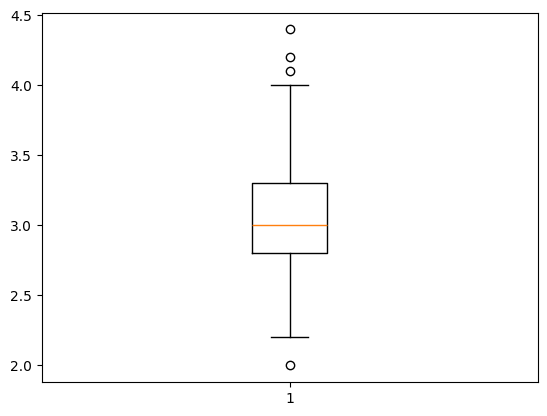

In [12]:
plt.boxplot(data['sepal_width'])

In [13]:
# Detect outliers using IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define a function to identify outliers
def detect_outliers_iqr(data):
    outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
    return outliers

# Apply the function to the dataframe
outliers = detect_outliers_iqr(data)

# Print outliers summary
print(outliers.sum())


petal_length    0
petal_width     0
sepal_length    0
sepal_width     4
species         0
dtype: int64


In [14]:
# Remove outliers from the dataframe
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<Axes: >

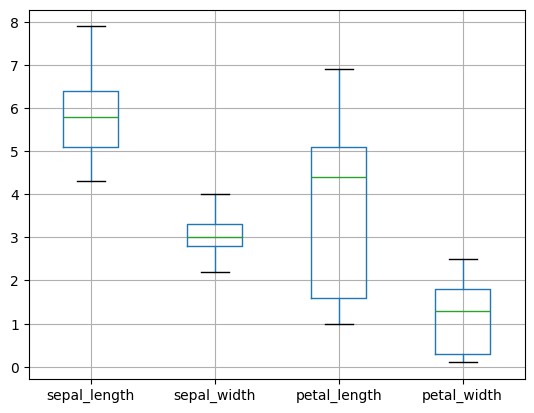

In [15]:
data.boxplot()

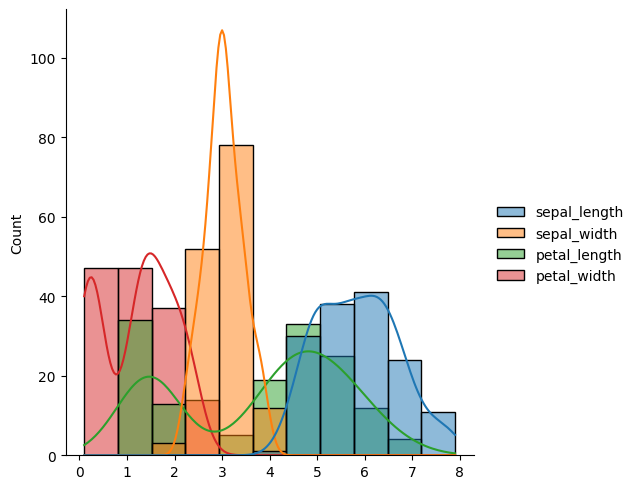

In [16]:
sns.displot(data,kde='hue')

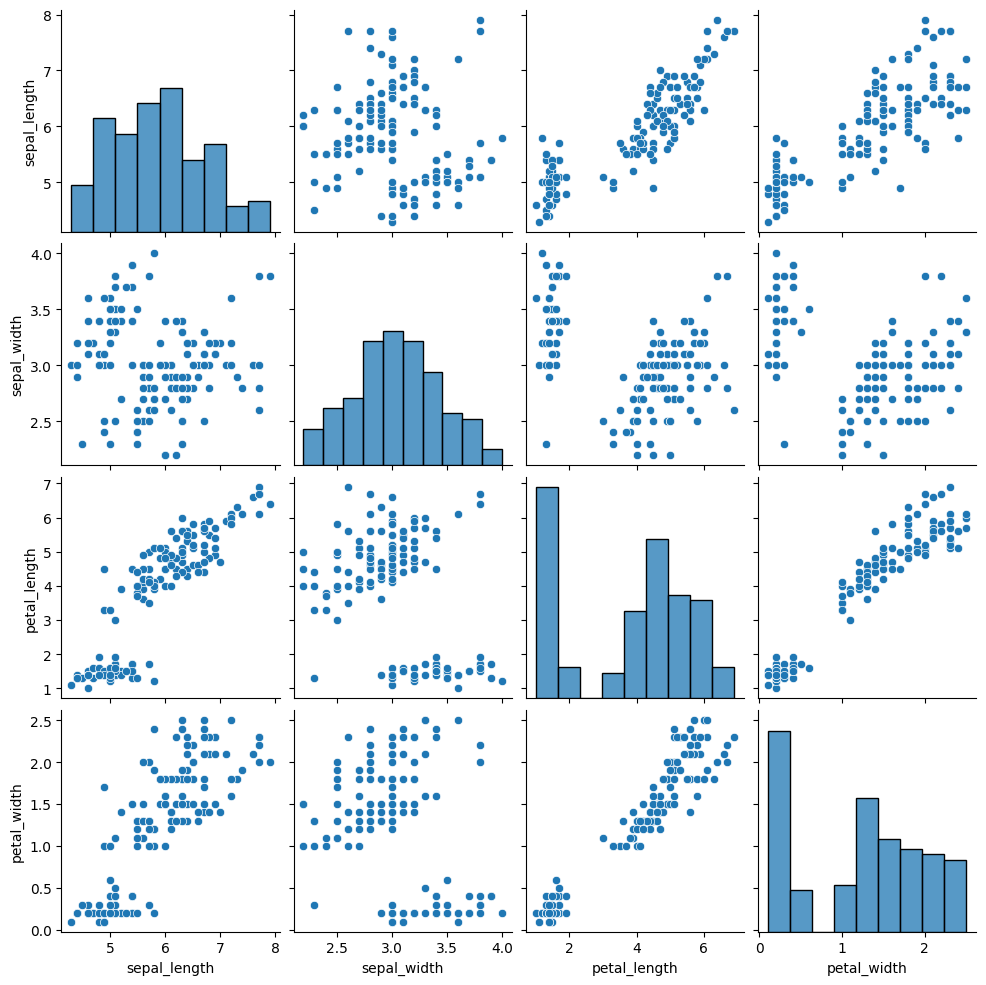

In [17]:
sns.pairplot(data)

<Axes: >

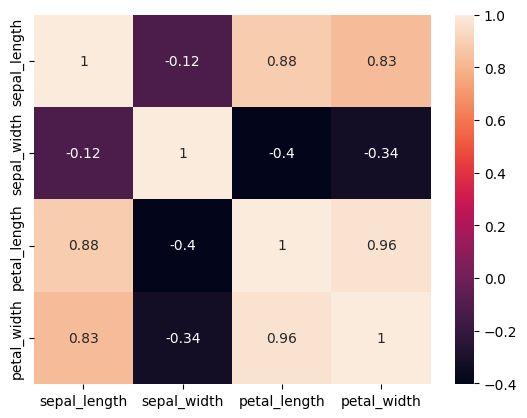

In [18]:
sns.heatmap(data.corr(),annot=True)

Data Encoding: categorical to numerical

In [19]:
data.dtypes=='object'

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species          True
dtype: bool

In [20]:
label=LabelEncoder()
data['species']=label.fit_transform(data['species'])
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [21]:
data.species.unique()

array([0, 1, 2])

Split the data 

In [22]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((116, 4), (29, 4), (116,), (29,))

Model Building

In [24]:
model=GaussianNB()

In [25]:
model.fit(x_train,y_train)

GaussianNB()

In [26]:
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.9655172413793104
Testing Accuracy : 0.9310344827586207


In [27]:
y_pred=model.predict(x_test)
y_pred

array([1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 1, 2, 1, 2, 0, 2, 2, 2, 2, 1, 2,
       0, 2, 0, 0, 1, 1, 2])

Model Evaluation

In [28]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.78      1.00      0.88         7
           2       1.00      0.85      0.92        13

    accuracy                           0.93        29
   macro avg       0.93      0.95      0.93        29
weighted avg       0.95      0.93      0.93        29



In [29]:
print(accuracy_score(y_pred,y_test))

0.9310344827586207


In [30]:
print(confusion_matrix(y_pred,y_test))

[[ 9  0  0]
 [ 0  7  0]
 [ 0  2 11]]


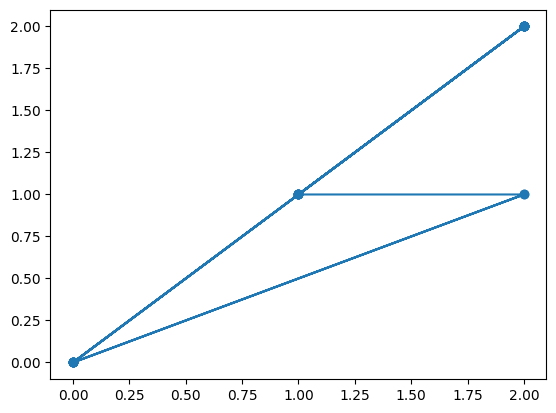

In [31]:
plt.scatter(y_pred,y_test)
plt.plot(y_pred,y_test)

Hyper parameter tunning:

In [40]:
param_grid = {
    'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]
}
clf= GridSearchCV(model, param_grid=param_grid, cv=5, scoring='accuracy')
clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='accuracy')

In [41]:
clf.best_params_

{'var_smoothing': 1e-09}

In [43]:
print("Training Accuracy :", clf.score(x_train, y_train))
print("Testing Accuracy :", clf.score(x_test, y_test))

Training Accuracy : 0.9655172413793104
Testing Accuracy : 0.9310344827586207
